In [1]:
#Model CAPM as a simple linear regression

In [73]:
from scipy import stats
import numpy as np
import pandas as pd
import pandas_datareader as web 
import matplotlib.pyplot as plt
%matplotlib inline

start = pd.to_datetime('2016-01-01')
end = pd.to_datetime('2020-07-13')

In [74]:
spy_etf = web.DataReader('SPY','yahoo',start, end)

In [75]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1139 entries, 2016-01-04 to 2020-07-13
Data columns (total 6 columns):
High         1139 non-null float64
Low          1139 non-null float64
Open         1139 non-null float64
Close        1139 non-null float64
Volume       1139 non-null float64
Adj Close    1139 non-null float64
dtypes: float64(6)
memory usage: 62.3 KB


In [76]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,201.029999,198.589996,200.490005,201.020004,222353500.0,184.025345
2016-01-05,201.899994,200.050003,201.399994,201.360001,110845800.0,184.336609
2016-01-06,200.059998,197.600006,198.339996,198.820007,152112600.0,182.011322
2016-01-07,197.440002,193.589996,195.330002,194.050003,213436100.0,177.644592
2016-01-08,195.850006,191.580002,195.190002,191.919998,209817200.0,175.694717


In [77]:
aapl = web.DataReader('AAPL', 'yahoo', start, end)

In [78]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,97.948441
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.493919
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,93.625145
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,89.673714
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.147873


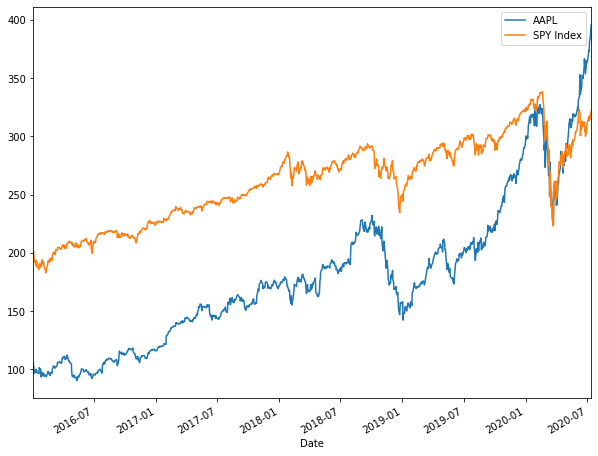

In [79]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

## Compare Cumulative Return

In [80]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]


Text(0.5, 1.0, 'Cumulative Returns')

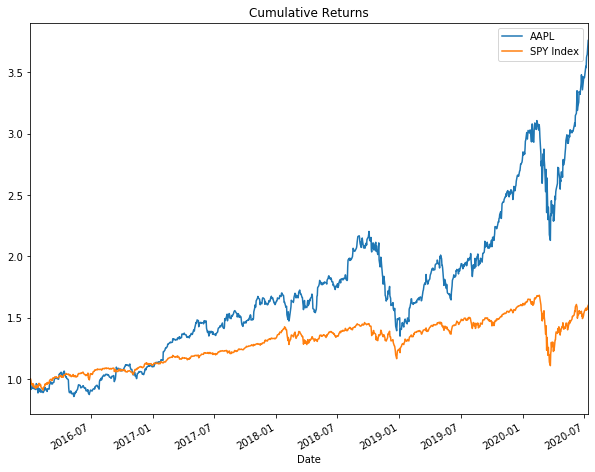

In [81]:
aapl['Cumulative'].plot(label='AAPL', figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Returns')

## Get Daily Return

In [82]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

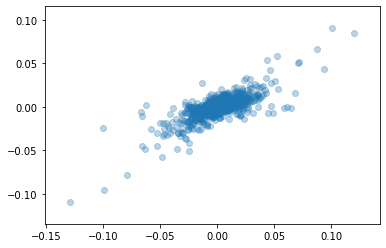

In [83]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'], alpha = 0.3)

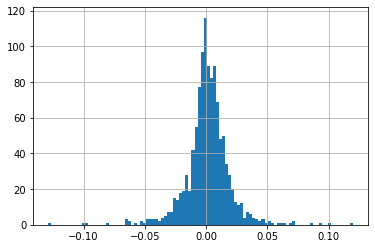

In [84]:
aapl['Daily Return'].hist(bins=100)

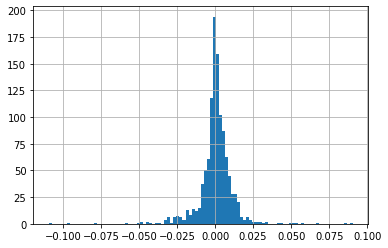

In [85]:
spy_etf['Daily Return'].hist(bins=100)

In [86]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [87]:
beta

0.5111217223178115

In [88]:
alpha

-0.000193318229704996

In [89]:
r_value

0.7708508859819664

## What if the stock was completely related to SP500?

In [90]:
spy_etf['Daily Return'].head()

Date
2016-01-04         NaN
2016-01-05    0.001691
2016-01-06   -0.012614
2016-01-07   -0.023992
2016-01-08   -0.010977
Name: Daily Return, dtype: float64

In [91]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [92]:
noise

array([ 4.03321317e-04, -4.29183838e-04, -3.11293640e-04, ...,
       -8.82106124e-04,  2.21221310e-05, -1.71011949e-03])

In [93]:
spy_etf['Daily Return'].iloc[1:] + noise

Date
2016-01-05    0.002095
2016-01-06   -0.013043
2016-01-07   -0.024303
2016-01-08   -0.011547
2016-01-11    0.001443
2016-01-12    0.008321
2016-01-13   -0.025148
2016-01-14    0.016035
2016-01-15   -0.020041
2016-01-19    0.000926
2016-01-20   -0.013253
2016-01-21    0.006381
2016-01-22    0.021250
2016-01-25   -0.014603
2016-01-26    0.012187
2016-01-27   -0.010197
2016-01-28    0.003530
2016-01-29    0.023101
2016-02-01    0.000039
2016-02-02   -0.018765
2016-02-03    0.008061
2016-02-04    0.000576
2016-02-05   -0.018148
2016-02-08   -0.014415
2016-02-09   -0.000805
2016-02-10   -0.001093
2016-02-11   -0.012805
2016-02-12    0.022520
2016-02-16    0.016920
2016-02-17    0.015479
                ...   
2020-06-01    0.003462
2020-06-02    0.008358
2020-06-03    0.012969
2020-06-04   -0.002621
2020-06-05    0.026451
2020-06-08    0.010473
2020-06-09   -0.007923
2020-06-10   -0.006019
2020-06-11   -0.056507
2020-06-12    0.011865
2020-06-15    0.010212
2020-06-16    0.019351
2020-0

In [94]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])

In [95]:
beta

0.9926702884434123

In [96]:
alpha

3.0236775259739814e-05